In [1]:
import tensorflow as tf
import numpy as np
import pathlib

TRAIN_IMG_HEIGHT = 800
TRAIN_IMG_WIDTH = 800

HOME_DATA_DIR = "./data"
TRAIN_DATA_DIR = '/train'
TEST_DATA_DIR = '/test'

TRAIN_DATA_PATH = HOME_DATA_DIR + TRAIN_DATA_DIR
TEST_DATA_PATH = HOME_DATA_DIR + TEST_DATA_DIR

train_dir = pathlib.Path(TRAIN_DATA_PATH)


folders = list(train_dir.glob("*"))

CLASS_NAMES = np.array([folder.name for folder in folders])

CLASS_COUNT = len(CLASS_NAMES)
print("{} classes found: {}".format(CLASS_COUNT,CLASS_NAMES))



6 classes found: ['fifi' 'ittimetrack' 'mactrack' 'repeatvisit' 'scudm' 'webparts']


### Creating Test Dataset

In [2]:
test_dir = pathlib.Path(TEST_DATA_PATH)
test_image_count = len(list(test_dir.glob("*.png")))

test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

TEST_BATCH_SIZE = 100
TEST_IMG_HEIGHT = 800
TEST_IMG_WIDTH = 800
TEST_STEPS_PER_EPOCH = np.ceil(test_image_count/TEST_BATCH_SIZE)

test_data_gen = test_image_generator.flow_from_directory(directory=str(test_dir),
                                                     batch_size=TEST_BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(TEST_IMG_HEIGHT,TEST_IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 612 images belonging to 6 classes.


## Creating model architecture

In [3]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

# model = Sequential([
#     Conv2D(40, 3, activation="relu", input_shape=(TRAIN_IMG_HEIGHT, TRAIN_IMG_WIDTH, 3)),
#     MaxPooling2D(),
#     Conv2D(40, 3, activation="relu"),
#     MaxPooling2D(),
#     Flatten(),
#     Dense(20, activation='relu'),
#     Dense(20, activation='relu'),
#     Dense(CLASS_COUNT, activation='sigmoid')
# ])

# model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# model.summary()

### Loading saved model

In [4]:
# Recreate the exact same model purely from the file
new_model = tf.keras.models.load_model('saved_model_v1.h5')

### Predict the images using model

In [5]:
batch_images, batch_labels = next(test_data_gen)

predictions = new_model.predict(batch_images)

### Show predictions

Total Number of Images available: 100
76 out of 100 is correct


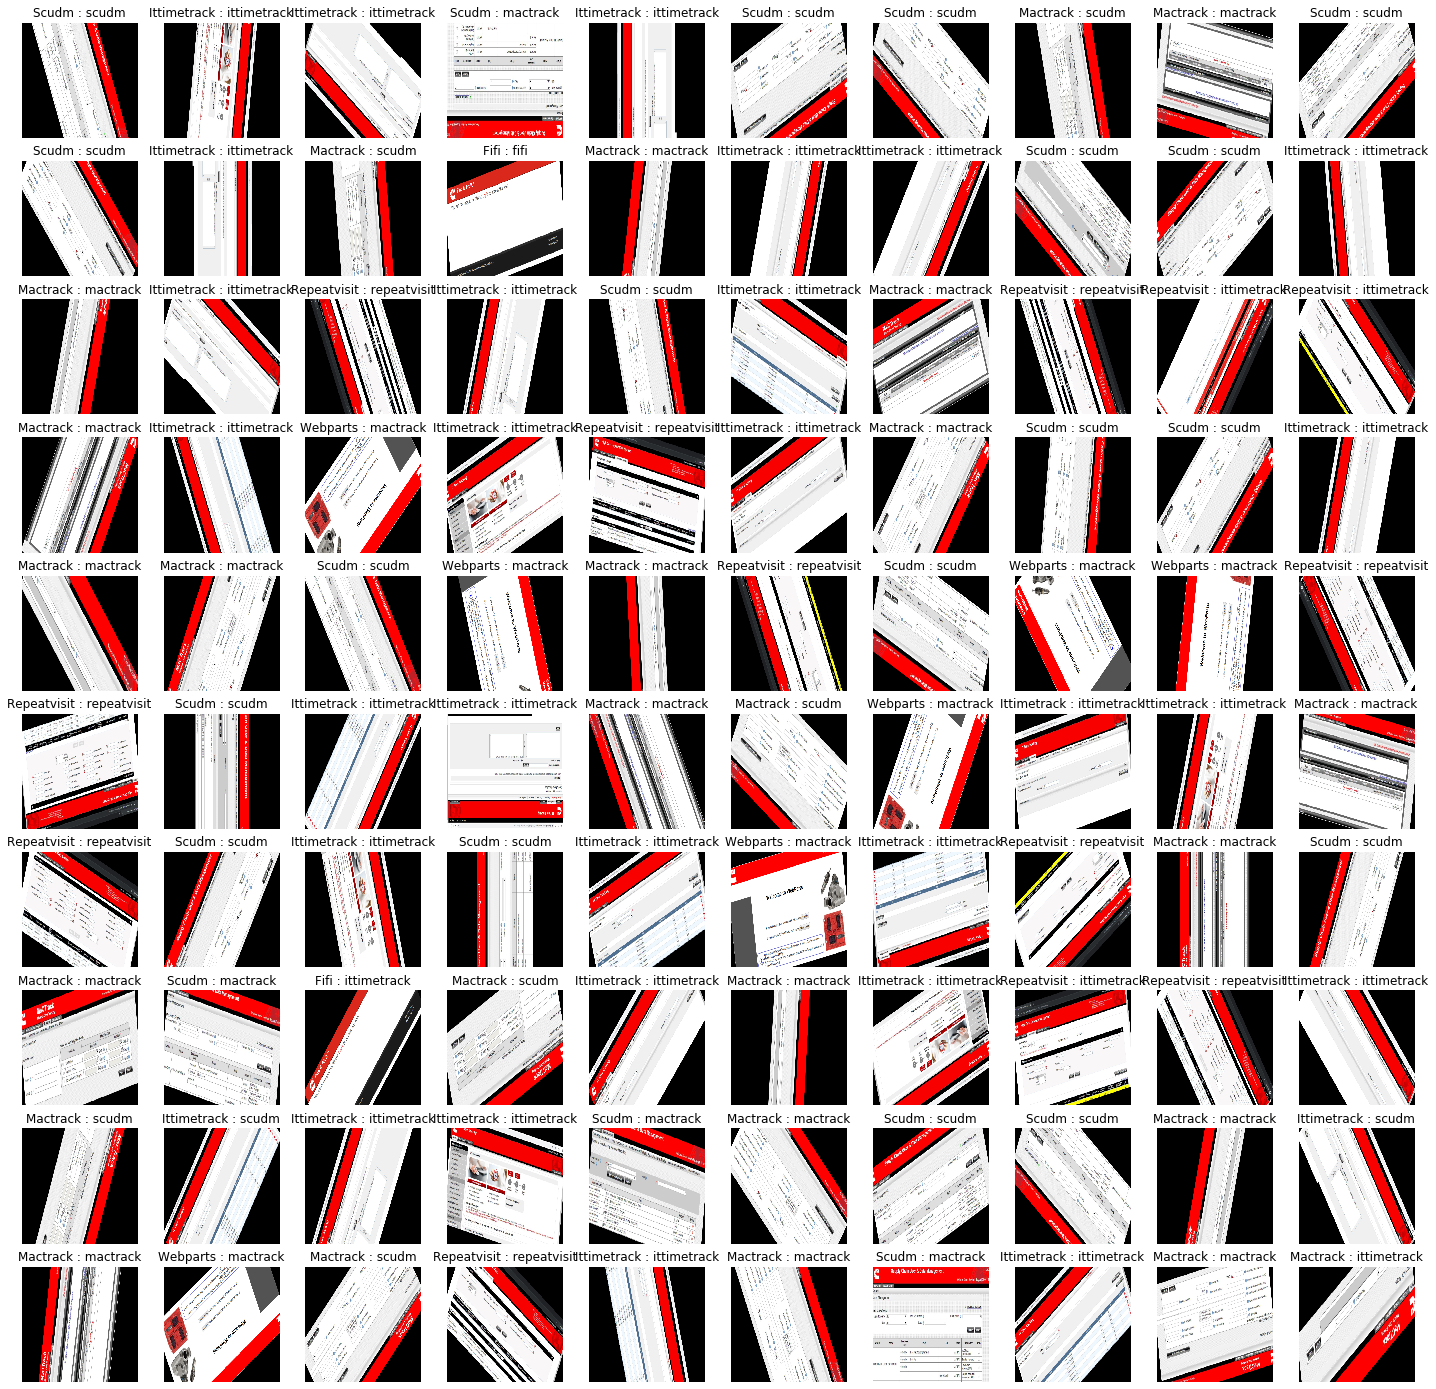

In [7]:
import matplotlib.pyplot as plt
import math

def showEvaluationResults(images, labels, predictions):
    size = len(images)
    plotSize = math.ceil(math.sqrt(size))
    count=0
    print("Total Number of Images available: "+ str(size))
    plt.figure(figsize=(25,25))
    for n in range(size):
        ax = plt.subplot(plotSize,plotSize,n+1)
        plt.imshow(images[n])
        lbl=CLASS_NAMES[labels[n] == True][0]
        pred=CLASS_NAMES[np.argmax(predictions[n])]
        plt.title(lbl.title() +" : "+ pred)
        plt.axis('off')
        if lbl == pred:
            count=count+1
    print('{} out of {} is correct'.format(count,size))
    plt.show()

#print (predictions)

showEvaluationResults(batch_images, batch_labels, predictions)